Checking the environment 

In [2]:
import sys
print (sys.executable)

C:\Users\Asus\finbert_env\Scripts\python.exe


Important libraries

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Loading tokennizer and model from hugging face

tokenizer = AutoTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = AutoModelForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')


#evaluation mode of the model
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30873, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [31]:
texts = [
    "The 2024 presidential election has ended, and Donald Trump is poised to retake the White house , with big implications for student loan forgiveness and repayment programs that would impact millions of borrowers",
    "With recent policy shifts and the prospect of new tariffs on imported goods, consumers may start to see noticeable changes in grocery store prices.",
    "This increase in prices contributes directly to inflation , which erodes the purchasing power of money."
    
]

#Samples

In [32]:
inputs = tokenizer(texts, padding = True, truncation = True, return_tensors = "pt")

In [33]:
#Sentiment Analysis

with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits
probabilities = torch.nn.functional.softmax(logits, dim=-1)
predicted_labels = torch.argmax(probabilities, dim = 1)

label_mapping = {0: 'Neutral', 1:'positive', 2: "negative"}
sentiments = [label_mapping[label.item()] for label in predicted_labels]

for i, text in enumerate(texts):
    print(f'Text: {text}')
    print("Probabilities:")
    for j, prob in enumerate(probabilities[i]):
        sentiment_label = label_mapping[j]
        print(f"  {sentiment_label}: {prob.item():.4f}")
    print(f"Predicted Sentiment: {sentiments[i]}\n")



Text: The 2024 presidential election has ended, and Donald Trump is poised to retake the White house , with big implications for student loan forgiveness and repayment programs that would impact millions of borrowers
Probabilities:
  Neutral: 0.0269
  positive: 0.0064
  negative: 0.9666
Predicted Sentiment: negative

Text: With recent policy shifts and the prospect of new tariffs on imported goods, consumers may start to see noticeable changes in grocery store prices.
Probabilities:
  Neutral: 0.7940
  positive: 0.0006
  negative: 0.2054
Predicted Sentiment: Neutral

Text: This increase in prices contributes directly to inflation , which erodes the purchasing power of money.
Probabilities:
  Neutral: 0.0098
  positive: 0.0056
  negative: 0.9846
Predicted Sentiment: negative



Vizualization of Sentiment Distribution 

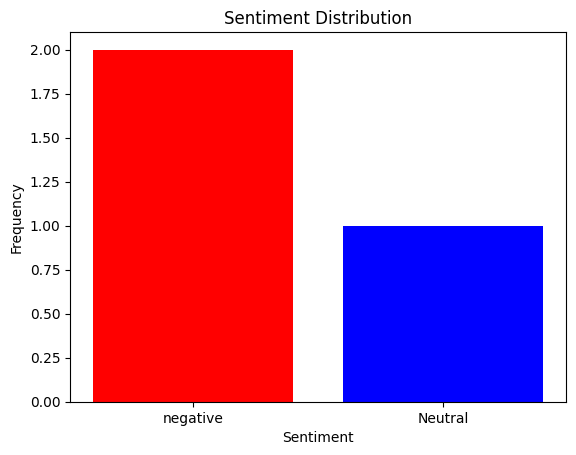

In [34]:
from collections import Counter

sentiment_counts = Counter(sentiments)

plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color = ["red", "blue", "green"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()